In [16]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [17]:
df =pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
df.shape

(50, 5)

In [19]:
import missingno as msno

<AxesSubplot:>

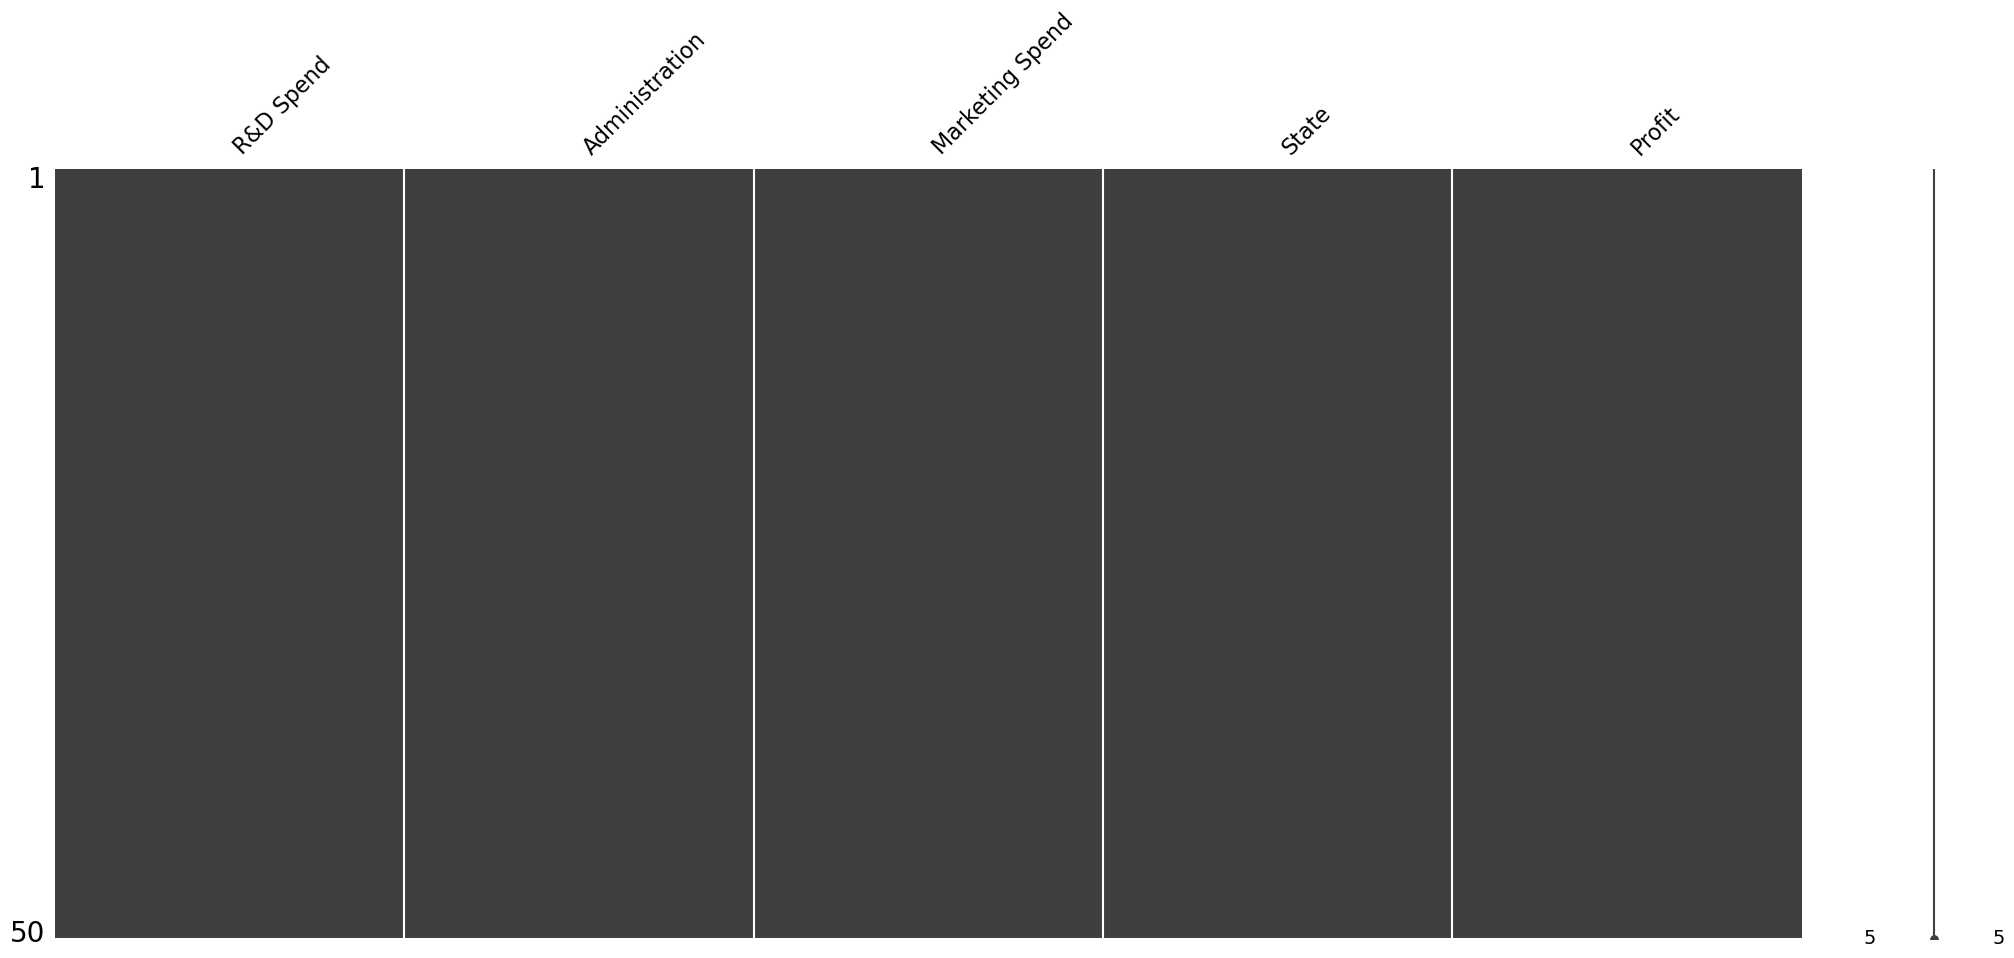

In [20]:
msno.matrix(df)

In [21]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [23]:
X = df['R&D Spend'].values.reshape(-1,1)
y = df['Profit'].values.reshape(-1,1)

In [24]:
X

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34],
       [131876.9 ],
       [134615.46],
       [130298.13],
       [120542.52],
       [123334.88],
       [101913.08],
       [100671.96],
       [ 93863.75],
       [ 91992.39],
       [119943.24],
       [114523.61],
       [ 78013.11],
       [ 94657.16],
       [ 91749.16],
       [ 86419.7 ],
       [ 76253.86],
       [ 78389.47],
       [ 73994.56],
       [ 67532.53],
       [ 77044.01],
       [ 64664.71],
       [ 75328.87],
       [ 72107.6 ],
       [ 66051.52],
       [ 65605.48],
       [ 61994.48],
       [ 61136.38],
       [ 63408.86],
       [ 55493.95],
       [ 46426.07],
       [ 46014.02],
       [ 28663.76],
       [ 44069.95],
       [ 20229.59],
       [ 38558.51],
       [ 28754.33],
       [ 27892.92],
       [ 23640.93],
       [ 15505.73],
       [ 22177.74],
       [  1000.23],
       [  1315.46],
       [     0.  ],
       [   542.05],
       [     0.  ]])

In [25]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,
                                                     test_size=0.2,
                                                     random_state=42,
                                                     shuffle=True
                                                    )

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 1)
(10, 1)
(40, 1)
(10, 1)


# Linear Regression

In [27]:
regressor = LinearRegression()  

In [28]:
regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [31]:
y_pred

array([[127862.20996405],
       [ 82250.56334619],
       [102255.72078164],
       [ 50190.4734756 ],
       [130136.88190548],
       [ 49799.36685472],
       [113638.0775288 ],
       [104535.0534288 ],
       [103463.04843113],
       [123105.31102669]])

In [32]:
y_test

array([[134307.35],
       [ 81005.76],
       [ 99937.59],
       [ 64926.08],
       [125370.37],
       [ 35673.41],
       [105733.54],
       [107404.34],
       [ 97427.84],
       [122776.86]])

# Evaluation of Model

In [33]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [34]:
print("MAE:",round(mean_absolute_error(y_train,y_pred_train),2))
print("RMSE:",round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2))
print("R**2:",round(r2_score(y_train,y_pred_train),2))

MAE: 7132.76
RMSE: 9571.05
R**2: 0.95


In [35]:
print("MAE:",round(mean_absolute_error(y_test,y_pred),2))
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
print("R**2:",round(r2_score(y_test,y_pred),2))

MAE: 6077.36
RMSE: 7714.33
R**2: 0.93


In [36]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data

,Actual,Predicted
0,134307.35,127862.209964
1,81005.76,82250.563346
2,99937.59,102255.720782
3,64926.08,50190.473476
4,125370.37,130136.881905
5,35673.41,49799.366855
6,105733.54,113638.077529
7,107404.34,104535.053429
8,97427.84,103463.048431
9,122776.86,123105.311027


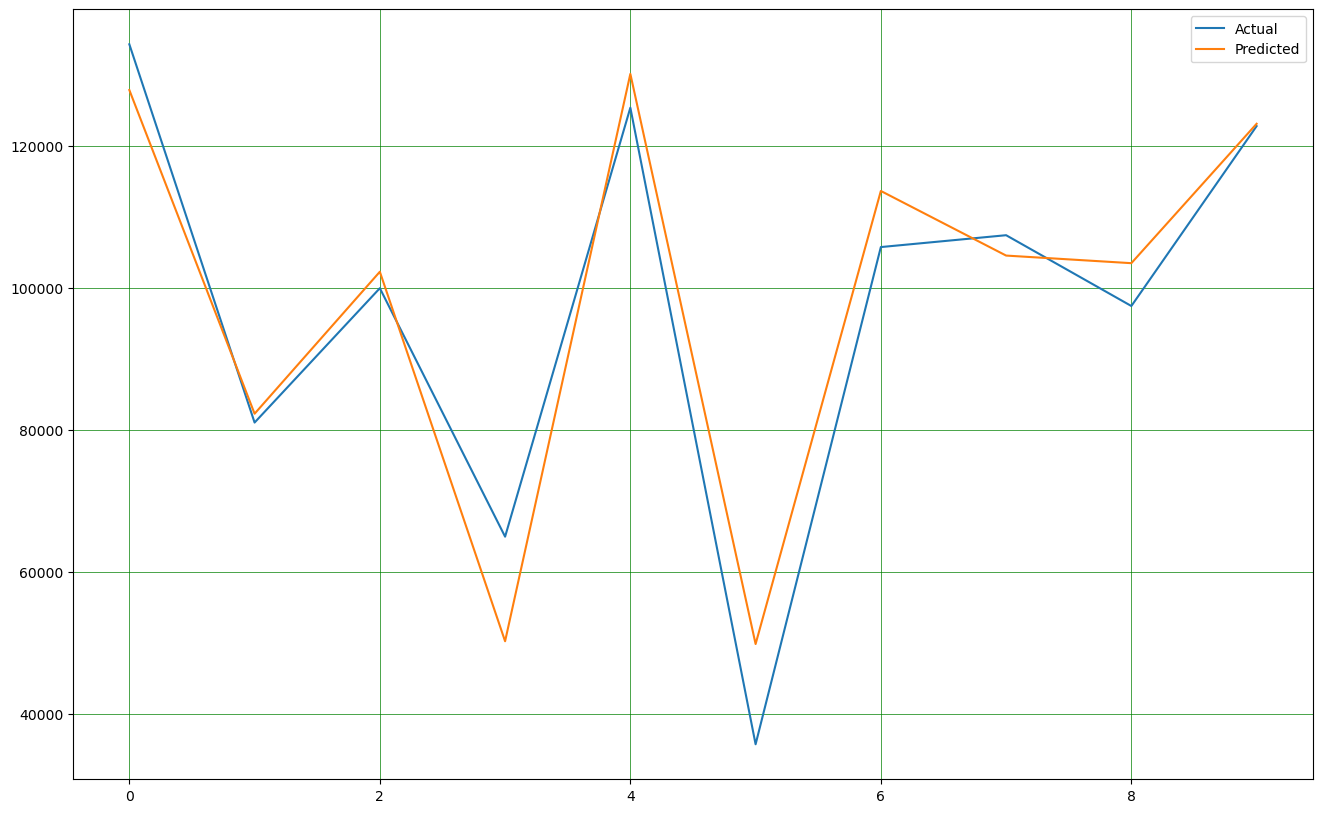

In [37]:
df1 = data.head(25)
df1.plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

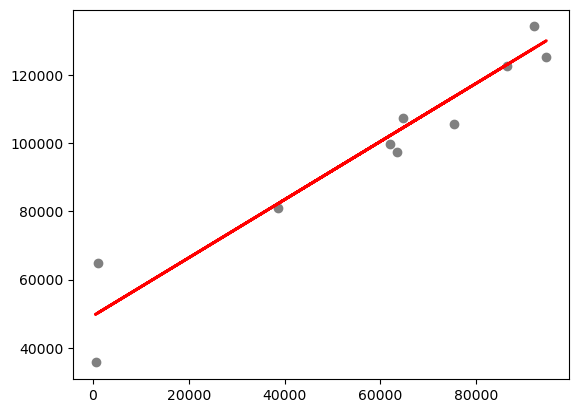

In [38]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()